# 1. Import and Install Dependencies

In [1]:
# Uninstall existing OpenCV installations
!pip uninstall -y opencv-python opencv-contrib-python
# Install required packages
!pip install --no-cache-dir opencv-python==4.8.0.74 opencv-contrib-python==4.8.0.74 mediapipe tensorflow scikit-learn matplotlib
# Verify OpenCV installation
try:
    import cv2
    print(f"OpenCV version: {cv2.__version__}")
    print("OpenCV imported successfully!")
except ImportError as e:
    print(f"Error importing OpenCV: {e}")

Found existing installation: opencv-python 4.8.0.74
Uninstalling opencv-python-4.8.0.74:
  Successfully uninstalled opencv-python-4.8.0.74
Found existing installation: opencv-contrib-python 4.8.0.74
Uninstalling opencv-contrib-python-4.8.0.74:
  Successfully uninstalled opencv-contrib-python-4.8.0.74
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.1 MB 8.4 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/38.1 MB 10.6 MB/s eta 0:00:04
   ------ --------------------------------- 6.6/38.1 MB 12.2 MB/s eta 0:00:03
   ---------- ----------------------------- 10.0/38.1 MB 13.2 MB/s eta 0:00:03
   --------------- ------------------------ 14.4/38.1 MB 14.9 MB/s eta 0:00:02
   -------------------- ------------------- 19.1/38.1 MB 16.3 MB/s eta 0:00:02
   -------------------------- ------------- 24.9/38.1 MB 17.9 MB/s eta 0:00:01
   -------------------------------- ------- 30.7/38.1 MB 19.5 MB/s eta 0:00:01


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
%pip install --user mediapipe

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install mediapipe

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%pip install matplotlib mediapipe


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 2. Keypoints using MP Holistic

In [8]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [9]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [10]:
def draw_landmarks(image, results):
    # Import face mesh connections
    mp_face_mesh = mp.solutions.face_mesh
    
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION
        )
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.pose_landmarks,
            connections=mp_holistic.POSE_CONNECTIONS
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.left_hand_landmarks,
            connections=mp_holistic.HAND_CONNECTIONS
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.right_hand_landmarks,
            connections=mp_holistic.HAND_CONNECTIONS
        )

In [11]:
# Import required MediaPipe solutions
mp_face_mesh = mp.solutions.face_mesh

def draw_styled_landmarks(image, results):
    # Draw only if landmarks exist
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.pose_landmarks,
            connections=mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.left_hand_landmarks,
            connections=mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.right_hand_landmarks,
            connections=mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

In [12]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [13]:
draw_landmarks(frame, results)

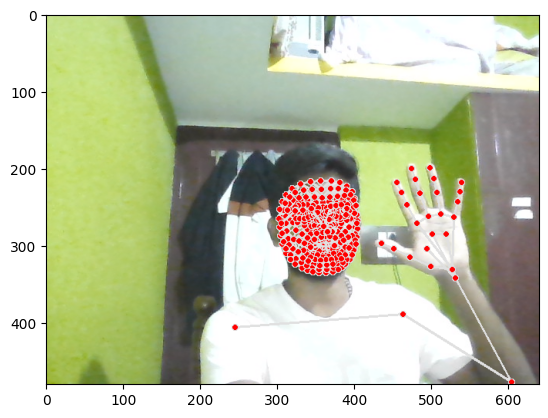

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [15]:
len(results.left_hand_landmarks.landmark)

21

In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [18]:
# Assuming results is from MediaPipe Face Mesh
if results.face_landmarks:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
else:
    face = np.zeros(1404)

In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [20]:
result_test = extract_keypoints(results)

In [21]:
result_test

array([ 0.56369644,  0.57403535, -0.53221786, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
np.save('0', result_test)

In [23]:
np.load('0.npy')

array([ 0.56369644,  0.57403535, -0.53221786, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [24]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Start from sequence 1
start_folder = 1  # Changed from 30 to 1 to collect data from the beginning

In [25]:
import os
import numpy as np

for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    # Ensure action directory exists
    os.makedirs(action_path, exist_ok=True)
    # Get list of directories
    dir_list = [d for d in os.listdir(action_path) if d.isdigit()]
    # Set dirmax to 0 if directory is empty, else find max
    dirmax = np.max(np.array(dir_list).astype(int)) if dir_list else 0
    for sequence in range(1, no_sequences + 1):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax + sequence)), exist_ok=True)
        except OSError as e:
            print(f"Error creating directory: {e}")

# 5. Collect Keypoint Values for Training and Testing

In [26]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder + no_sequences):
            # Create sequence folder if it doesn't exist
            sequence_path = os.path.join(DATA_PATH, action, str(sequence))
            try:
                os.makedirs(sequence_path, exist_ok=True)
            except OSError as e:
                print(f"Error creating directory {sequence_path}: {e}")
                continue

            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                # Read feed
                ret, frame = cap.read()
                if not ret:
                    print("Failed to get frame from camera")
                    continue

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Show collection progress
                cv2.putText(image, 'COLLECTING FRAME {} of {}'.format(frame_num + 1, sequence_length), (15,12), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                cv2.putText(image, 'Action: {} Sequence: {}'.format(action, sequence), (15,40), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
                cv2.putText(image, 'Press Q to skip to next sequence', (15,68), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
                
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(sequence_path, "{}.npy".format(frame_num))
                np.save(npy_path, keypoints)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            
            print(f"Collected sequence {sequence} for action {action}")
            if cv2.waitKey(1000) & 0xFF == ord('q'):  # Pause between sequences
                break
                
        print(f"Completed collecting data for action {action}")
        
cap.release()
cv2.destroyAllWindows()

Collected sequence 1 for action hello
Collected sequence 2 for action hello
Collected sequence 3 for action hello
Collected sequence 4 for action hello
Collected sequence 5 for action hello
Collected sequence 6 for action hello
Collected sequence 7 for action hello
Collected sequence 8 for action hello
Collected sequence 9 for action hello
Collected sequence 10 for action hello
Collected sequence 11 for action hello
Collected sequence 12 for action hello
Collected sequence 13 for action hello
Collected sequence 14 for action hello
Collected sequence 15 for action hello
Collected sequence 16 for action hello
Collected sequence 17 for action hello
Collected sequence 18 for action hello
Collected sequence 19 for action hello
Collected sequence 20 for action hello
Collected sequence 21 for action hello
Collected sequence 22 for action hello
Collected sequence 23 for action hello
Collected sequence 24 for action hello
Collected sequence 25 for action hello
Collected sequence 26 for action h

In [27]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [28]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
%pip install scikit-learn  

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}

In [32]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [33]:
import os
print(os.path.exists(os.path.join("MP_Data", "hello", "1")))
print(os.listdir(os.path.join("MP_Data", "hello", "1")))

True
['0.npy', '1.npy', '10.npy', '11.npy', '12.npy', '13.npy', '14.npy', '15.npy', '16.npy', '17.npy', '18.npy', '19.npy', '2.npy', '20.npy', '21.npy', '22.npy', '23.npy', '24.npy', '25.npy', '26.npy', '27.npy', '28.npy', '29.npy', '3.npy', '4.npy', '5.npy', '6.npy', '7.npy', '8.npy', '9.npy']


In [34]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [35]:
# First verify data exists
def verify_data():
    for action in actions:
        for sequence in range(start_folder, start_folder + no_sequences):
            sequence_path = os.path.join(DATA_PATH, action, str(sequence))
            if not os.path.exists(sequence_path):
                print(f'Missing folder: {sequence_path}')
                return False
            for frame_num in range(sequence_length):
                npy_path = os.path.join(sequence_path, f'{frame_num}.npy')
                if not os.path.exists(npy_path):
                    print(f'Missing file: {npy_path}')
                    return False
    print('All data files exist!')
    return True

# Run verification
if not verify_data():
    print('Please run the data collection cell first to capture all required data')
    raise FileNotFoundError('Missing data files')

All data files exist!


In [36]:
np.array(sequences).shape

(90, 30, 1662)

In [37]:
np.array(labels).shape

(90,)

In [38]:
X = np.array(sequences)

In [39]:
X.shape

(90, 30, 1662)

In [40]:
y = to_categorical(labels).astype(int)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [42]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf  # Added for optimizer and metrics

In [44]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [45]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\kmkis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['categorical_accuracy', 'Precision', 'Recall'])

In [47]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - Precision: 0.2562 - Recall: 0.0823 - categorical_accuracy: 0.3268 - loss: 1.3780  
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - Precision: 0.1864 - Recall: 0.0509 - categorical_accuracy: 0.3014 - loss: 1.2074    
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - Precision: 0.2301 - Recall: 0.1625 - categorical_accuracy: 0.2603 - loss: 5.5465
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - Precision: 0.1934 - Recall: 0.1096 - categorical_accuracy: 0.2329 - loss: 3.1498
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - Precision: 0.3813 - Recall: 0.3660 - categorical_accuracy: 0.4012 - loss: 3.3474
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - Precision: 0.2254 - Recall: 0.2192 - categorical_accuracy: 0.2192 - loss: 3.7497
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - Precision: 0.3816 - Recall: 0.3816 - categorical_accuracy: 0.3816 - loss: 3.2758
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - Precis

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make Predictions

In [49]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


In [50]:
actions[np.argmax(res[4])]

'iloveyou'

In [51]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [52]:
model.save('action.h5')

In [53]:
# Save model in TensorFlow.js format
!mkdir -p model
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'model')

ModuleNotFoundError: No module named 'tensorflowjs'

In [54]:
del model

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

# Recreate the model with the same architecture
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['categorical_accuracy', 'Precision', 'Recall'])

# Load the saved weights
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [56]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [57]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


In [58]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [59]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [60]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [61]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [62]:
def create_futuristic_overlay(image, header_height=120):
    # Create a semi-transparent dark overlay
    overlay = image.copy()
    # Dark gradient background for header
    cv2.rectangle(overlay, (0,0), (image.shape[1], header_height), (20,20,35), -1)
    # Add subtle gradient
    for i in range(header_height):
        cv2.line(overlay, (0,i), (image.shape[1],i), (20+i//4,20+i//4,35+i//4), 1)
    
    # Add glowing border
    border_color = (0, 150, 255)
    border_thickness = 2
    cv2.line(overlay, (0,header_height), (image.shape[1],header_height), 
             border_color, border_thickness)
    
    # Blend overlay with original image
    alpha = 0.85
    return cv2.addWeighted(overlay, alpha, image, 1-alpha, 0)

def draw_futuristic_text(image, text, position, size=0.7, color=(255,255,255), thickness=2):
    # Draw glowing text effect
    blur_amount = 2
    # Draw blurred text for glow effect
    cv2.putText(image, text, position, cv2.FONT_HERSHEY_SIMPLEX, size, 
                (color[0]//4, color[1]//4, color[2]//4), thickness+2, cv2.LINE_AA)
    # Draw sharp text over it
    cv2.putText(image, text, position, cv2.FONT_HERSHEY_SIMPLEX, size, 
                color, thickness, cv2.LINE_AA)

def draw_progress_bar(image, value, max_value, pos_x, pos_y, width=200, height=20):
    # Background
    cv2.rectangle(image, (pos_x, pos_y), (pos_x + width, pos_y + height), 
                 (50,50,50), -1)
    # Progress
    progress_width = int((value/max_value) * width)
    cv2.rectangle(image, (pos_x, pos_y), (pos_x + progress_width, pos_y + height), 
                 (0,255,255), -1)
    # Glowing border
    cv2.rectangle(image, (pos_x, pos_y), (pos_x + width, pos_y + height), 
                 (100,100,100), 1)

def draw_probability_bars(image, probabilities, actions, start_y, colors):
    bar_height = 25
    spacing = 35
    max_width = 250
    text_offset = 180
    
    for i, (action, prob) in enumerate(zip(actions, probabilities)):
        y = start_y + (i * spacing)
        # Background
        cv2.rectangle(image, (10, y), (10 + max_width, y + bar_height), 
                     (40,40,40), -1)
        # Progress bar
        width = int(prob * max_width)
        cv2.rectangle(image, (10, y), (10 + width, y + bar_height), 
                     colors[i], -1)
        # Add gradient
        for w in range(width):
            alpha = w/width
            cv2.line(image, (10+w, y), (10+w, y+bar_height), 
                    tuple(int(c*alpha) for c in colors[i]), 1)
        
        # Text
        text = f'{action}: {prob:.1%}'
        draw_futuristic_text(image, text, (max_width + 20, y + 20), 
                           0.6, (200,200,200), 1)

In [64]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'prob_viz' is not defined

<Figure size 1800x1800 with 0 Axes>

In [65]:
# Initialize variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

# Set up video capture
cap = cv2.VideoCapture(0)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# UI Configuration
header_height = 120
colors = [(0,255,255), (255,100,0), (0,255,100)]  # Futuristic colors

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        if not ret:
            continue

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks with adjusted colors
        draw_styled_landmarks(image, results)
        
        # Apply futuristic overlay
        image = create_futuristic_overlay(image, header_height)
        
        # Add system status
        draw_futuristic_text(image, 'GESTURE RECOGNITION SYSTEM', (10, 30), 
                           0.7, (0,255,255), 2)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        # Draw frame collection progress
        if len(sequence) < 30:
            status = f'Collecting Frames: {len(sequence)}/30'
            progress = len(sequence)/30
            draw_progress_bar(image, len(sequence), 30, 10, 50, 200, 15)
        else:
            status = 'Analysis Active'
            progress = 1
        
        # Add status with glow effect
        draw_futuristic_text(image, status, (220, 30), 0.7, 
                           (100,255,100) if len(sequence) == 30 else (255,100,0), 2)
        
        # Make predictions
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            # Update detection logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Draw probability visualization
            draw_probability_bars(image, res, actions, header_height + 10, colors)

            # Display detected actions
            if sentence:
                text = ' » '.join(sentence)  # Using modern separator
                draw_futuristic_text(image, text, (10, header_height - 25), 
                                   1.0, (0,255,255), 2)
        
        # Add exit instruction
        draw_futuristic_text(image, 'Press Q to Exit', 
                           (frame_width - 150, frame_height - 20), 
                           0.5, (150,150,150), 1)
        
        # Show to screen
        cv2.imshow('Gesture Recognition System', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━